In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# Wrangle Data

In [2]:
import wrangle

from wrangle import wrangle_zillow
from wrangle import split
from wrangle import seperate_y
from wrangle import scale_data

### Acquire

In [3]:
df = wrangle_zillow()

In [4]:
df.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
12177905,2376.0,4,3,6037,13038.0,145143.0,51
12069064,738.0,2,1,6037,4214.0,218552.0,99
12790562,3039.0,4,3,6037,20028.0,220583.0,51
11104527,2540.0,4,3,6037,10384.0,430108.0,22
11830315,1146.0,2,1,6037,4657.0,273745.0,82


In [5]:
df.shape

(44134, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44134 entries, 12177905 to 13083743
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  44134 non-null  float64
 1   bedrooms     44134 non-null  int64  
 2   bathrooms    44134 non-null  int64  
 3   fips         44134 non-null  int64  
 4   lot_size     44134 non-null  float64
 5   tax_value    44134 non-null  float64
 6   house_age    44134 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


In [7]:
df.describe()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
count,44134.000000,44134.000000,44134.000000,44134.000000,44134.000000,4.413400e+04,44134.000000
mean,1660.511828,3.104862,2.087280,6044.832238,7567.313251,3.954958e+05,58.775389
std,619.006780,0.881571,0.778361,18.275731,3860.952216,2.897003e+05,22.692376
min,152.000000,1.000000,1.000000,6037.000000,236.000000,3.254000e+03,5.000000
25%,1204.000000,3.000000,2.000000,6037.000000,5442.250000,1.803428e+05,42.000000
50%,1534.000000,3.000000,2.000000,6037.000000,6708.500000,3.372200e+05,62.000000
75%,2019.000000,4.000000,3.000000,6037.000000,8374.750000,5.327890e+05,71.000000
max,3499.000000,9.000000,7.000000,6111.000000,23772.000000,1.679968e+06,143.000000


### Split

In [8]:
train, validate, test = split(df)

In [9]:
train.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
17149884,1913.0,4,2,6111,6418.0,479808.0,39
17254400,1509.0,3,2,6111,7778.0,461938.0,60
11183212,2202.0,4,3,6037,22099.0,211036.0,32
14237595,1314.0,4,2,6059,6025.0,54850.0,62
11270155,2130.0,3,3,6037,6927.0,277000.0,33


In [10]:
train.shape

(24714, 7)

In [11]:
validate.shape

(10593, 7)

In [12]:
test.shape

(8827, 7)

### Seperate Target 

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [14]:
X_train.shape

(24714, 6)

In [15]:
y_train.shape

(24714,)

In [16]:
X_validate.shape

(10593, 6)

In [17]:
y_validate.shape

(10593,)

In [18]:
X_test.shape

(8827, 6)

In [19]:
y_test.shape

(8827,)

### Scale data

In [20]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [21]:
X_train.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
parcelid,,,,,,
17149884,1913.0,4,2,6111,6418.0,39
17254400,1509.0,3,2,6111,7778.0,60
11183212,2202.0,4,3,6037,22099.0,32
14237595,1314.0,4,2,6059,6025.0,62
11270155,2130.0,3,3,6037,6927.0,33


In [22]:
train_scaled.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
0,0.526143,0.375,0.166667,1.000000,0.262661,0.259542
1,0.405438,0.250,0.166667,1.000000,0.320445,0.419847
2,0.612489,0.375,0.333333,0.000000,0.928917,0.206107
3,0.347177,0.375,0.166667,0.297297,0.245964,0.435115
4,0.590977,0.250,0.333333,0.000000,0.284288,0.213740


In [23]:
X_validate.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
parcelid,,,,,,
14388104,2394.0,3,2,6059,8800.0,37
11308022,3209.0,5,3,6037,7208.0,15
10778757,1525.0,3,2,6037,5812.0,65
11008335,2051.0,3,3,6037,16993.0,34
14201151,2453.0,5,3,6059,5720.0,22


In [24]:
validate_scaled.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
0,0.669854,0.25,0.166667,0.297297,0.363868,0.244275
1,0.913355,0.50,0.333333,0.000000,0.296227,0.076336
2,0.410218,0.25,0.166667,0.000000,0.236914,0.458015
3,0.567374,0.25,0.333333,0.000000,0.711973,0.221374
4,0.687481,0.50,0.333333,0.297297,0.233005,0.129771


In [25]:
X_test.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
parcelid,,,,,,
17238290,1244.0,3,2,6111,8700.0,60
12265597,1460.0,3,1,6037,5125.0,69
11312364,1420.0,3,2,6037,8938.0,29
13000409,1192.0,3,2,6037,5270.0,67
12267495,1120.0,2,1,6037,6003.0,74


In [26]:
test_scaled.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
0,0.326262,0.250,0.166667,1.0,0.359619,0.419847
1,0.390798,0.250,0.000000,0.0,0.207724,0.488550
2,0.378847,0.250,0.166667,0.0,0.369731,0.183206
3,0.310726,0.250,0.166667,0.0,0.213885,0.473282
4,0.289214,0.125,0.000000,0.0,0.245029,0.526718


## Target Distribution

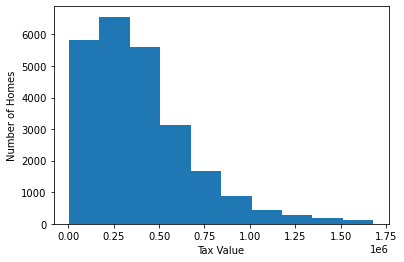

In [27]:
plt.hist(y_train)
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.show()

# Baseline

In [28]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [29]:
# 1. Predict tax_pred_mean
tax_pred_mean = y_train['tax_value'].mean()
y_train['tax_pred_mean'] = tax_pred_mean
y_validate['tax_pred_mean'] = tax_pred_mean

In [30]:
tax_pred_mean

394161.5018208303

In [31]:
# 2. compute tax_pred_median
tax_pred_median = y_train['tax_value'].median()
y_train['tax_pred_median'] = tax_pred_median
y_validate['tax_pred_median'] = tax_pred_median

In [32]:
tax_pred_median

338000.0

In [33]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median
parcelid,,,
17149884,479808.0,394161.501821,338000.0
17254400,461938.0,394161.501821,338000.0
11183212,211036.0,394161.501821,338000.0
14237595,54850.0,394161.501821,338000.0
11270155,277000.0,394161.501821,338000.0


In [34]:
y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median
parcelid,,,
14388104,328194.0,394161.501821,338000.0
11308022,302543.0,394161.501821,338000.0
10778757,330324.0,394161.501821,338000.0
11008335,463069.0,394161.501821,338000.0
14201151,711277.0,394161.501821,338000.0


In [35]:
# find residuals

y_train['residual_mean'] = y_train['tax_pred_mean'] - y_train['tax_value']
y_train['residual_median'] = y_train['tax_pred_median'] - y_train['tax_value']

y_validate['residual_mean'] = y_validate['tax_pred_mean'] - y_validate['tax_value']
y_validate['residual_median'] = y_validate['tax_pred_median'] - y_validate['tax_value']

In [36]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median
parcelid,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0
14237595,54850.0,394161.501821,338000.0,339311.501821,283150.0
11270155,277000.0,394161.501821,338000.0,117161.501821,61000.0


In [37]:
y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median
parcelid,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0
11008335,463069.0,394161.501821,338000.0,-68907.498179,-125069.0
14201151,711277.0,394161.501821,338000.0,-317115.498179,-373277.0


In [38]:
# square each residual value
y_train['residual_mean^2'] = y_train.residual_mean ** 2
y_train['residual_median^2'] = y_train.residual_median ** 2

y_validate['residual_mean^2'] = y_validate.residual_mean ** 2
y_validate['residual_median^2'] = y_validate.residual_median ** 2

y_train.head(3)

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2
parcelid,,,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0,7.335323e+09,2.010951e+10
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0,4.593654e+09,1.536063e+10
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0,3.353495e+10,1.611986e+10


In [39]:
y_validate.head(3)

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2
parcelid,,,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0,4.351711e+09,9.615764e+07
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0,8.393950e+09,1.257199e+09
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0,4.075227e+09,5.892098e+07


In [40]:
# SSE
SSE_mean = sum(y_train['residual_mean^2'])
SSE_median = sum(y_train['residual_median^2'])

print("SSE of Mean (Train) = ", SSE_mean)
print("SSE of Median (Train) = ", SSE_median)

SSE of Mean (Train) =  2038538074236233.2
SSE of Median (Train) =  2116488854719490.0


In [41]:
# SSE
SSE_mean_v = sum(y_validate['residual_mean^2'])
SSE_median_v = sum(y_validate['residual_median^2'])

print("SSE of Mean (Validate) = ", SSE_mean_v)
print("SSE of Median (Validate) = ", SSE_median_v)

SSE of Mean (Validate) =  919440865627532.0
SSE of Median (Validate) =  959894358260441.0


In [42]:
MSE_mean = SSE_mean/len(y_train)
MSE_median = SSE_median/len(y_train)

print("MSE_mean (Train) = ", MSE_mean)
print("MSE_median (Train) = ", MSE_median)

MSE_mean (Train) =  82485153121.15535
MSE_median (Train) =  85639267407.92627


In [43]:
MSE_mean_v = SSE_mean_v/len(y_train)
MSE_median_v = SSE_median_v/len(y_train)

print("MSE_mean (Validate)= ", MSE_mean_v)
print("MSE_median (Validate)= ", MSE_median_v)

MSE_mean (Validate)=  37203239687.121956
MSE_median (Validate)=  38840105133.14077


In [44]:
from math import sqrt
RMSE_mean = sqrt(MSE_mean)
RMSE_median = sqrt(MSE_median)

print("RMSE_mean (Train) = ", RMSE_mean)
print("RMSE_median (Train) = ", RMSE_median)

RMSE_mean (Train) =  287202.28606533643
RMSE_median (Train) =  292641.8756909651


In [45]:
RMSE_mean_v = sqrt(MSE_mean_v)
RMSE_median_v = sqrt(MSE_median_v)

print("RMSE_mean (Validate) = ", RMSE_mean_v)
print("RMSE_median (Validate) = ", RMSE_median_v)

RMSE_mean (Validate) =  192881.41353464298
RMSE_median (Validate) =  197078.93122589428


# LinearRegression (OLS)

In [46]:
# create the model object
lm = LinearRegression(normalize=True)

In [47]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.tax_value)

LinearRegression(normalize=True)

In [48]:
# predict train
y_train['tax_pred_lm'] = lm.predict(X_train)

In [49]:
y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm
parcelid,,,,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0,7.335323e+09,2.010951e+10,417469.083166
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0,4.593654e+09,1.536063e+10,408017.774506
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0,3.353495e+10,1.611986e+10,465705.706799
14237595,54850.0,394161.501821,338000.0,339311.501821,283150.0,1.151323e+11,8.017392e+10,264148.356803
11270155,277000.0,394161.501821,338000.0,117161.501821,61000.0,1.372682e+10,3.721000e+09,532306.322998


In [50]:
# evaluate: rmse
rmse_train_lm = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_lm))

rmse_train_lm

251226.53695358292

In [51]:
# predict validate
y_validate['tax_pred_lm'] = lm.predict(X_validate)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm
parcelid,,,,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0,4.351711e+09,9.615764e+07,557094.169444
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0,8.393950e+09,1.257199e+09,634989.594658
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0,4.075227e+09,5.892098e+07,368366.700034
11008335,463069.0,394161.501821,338000.0,-68907.498179,-125069.0,4.748243e+09,1.564225e+10,504071.344232
14201151,711277.0,394161.501821,338000.0,-317115.498179,-373277.0,1.005622e+11,1.393357e+11,480759.897099


In [52]:
# evaluate: rmse
rmse_validate_lm = sqrt(mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lm))

rmse_validate_lm

260839.94337525286

In [53]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  251226.53695358292 
Validation/Out-of-Sample:  260839.94337525286


# LassoLars

In [54]:
# create the model object
lars = LassoLars(alpha=1.0)

In [55]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

LassoLars()

In [56]:
# predict train
y_train['tax_pred_lars'] = lars.predict(X_train)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars
parcelid,,,,,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0,7.335323e+09,2.010951e+10,417469.083166,417316.706911
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0,4.593654e+09,1.536063e+10,408017.774506,407228.896215
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0,3.353495e+10,1.611986e+10,465705.706799,466863.894923
14237595,54850.0,394161.501821,338000.0,339311.501821,283150.0,1.151323e+11,8.017392e+10,264148.356803,264617.373093
11270155,277000.0,394161.501821,338000.0,117161.501821,61000.0,1.372682e+10,3.721000e+09,532306.322998,531988.470452


In [57]:
# evaluate: rmse
rmse_train_lars = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_lars))

rmse_train_lars

251227.22308993991

In [58]:
# predict validate
y_validate['tax_pred_lars'] = lars.predict(X_validate)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars
parcelid,,,,,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0,4.351711e+09,9.615764e+07,557094.169444,556877.661718
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0,8.393950e+09,1.257199e+09,634989.594658,635523.759355
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0,4.075227e+09,5.892098e+07,368366.700034,368315.080147
11008335,463069.0,394161.501821,338000.0,-68907.498179,-125069.0,4.748243e+09,1.564225e+10,504071.344232,504384.238194
14201151,711277.0,394161.501821,338000.0,-317115.498179,-373277.0,1.005622e+11,1.393357e+11,480759.897099,481281.763787


In [59]:
# evaluate: rmse
rmse_validate_lars = sqrt(mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lars))

rmse_validate_lars

260828.69067498902

In [60]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  251227.22308993991 
Validation/Out-of-Sample:  260828.69067498902


# TweedieRegressor (GLM)

In [61]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

In [62]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [63]:
# predict train
y_train['tax_pred_glm'] = glm.predict(X_train)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm
parcelid,,,,,,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0,7.335323e+09,2.010951e+10,417469.083166,417316.706911,394161.501821
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0,4.593654e+09,1.536063e+10,408017.774506,407228.896215,394161.501821
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0,3.353495e+10,1.611986e+10,465705.706799,466863.894923,394161.501821
14237595,54850.0,394161.501821,338000.0,339311.501821,283150.0,1.151323e+11,8.017392e+10,264148.356803,264617.373093,394161.501821
11270155,277000.0,394161.501821,338000.0,117161.501821,61000.0,1.372682e+10,3.721000e+09,532306.322998,531988.470452,394161.501821


In [64]:
# evaluate: rmse
rmse_train_glm = sqrt(mean_squared_error(y_train.tax_value, y_train.tax_pred_glm))

rmse_train_glm

287202.2860653361

In [65]:
# predict validate
y_validate['tax_pred_glm'] = glm.predict(X_validate)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm
parcelid,,,,,,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0,4.351711e+09,9.615764e+07,557094.169444,556877.661718,394161.501821
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0,8.393950e+09,1.257199e+09,634989.594658,635523.759355,394161.501821
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0,4.075227e+09,5.892098e+07,368366.700034,368315.080147,394161.501821
11008335,463069.0,394161.501821,338000.0,-68907.498179,-125069.0,4.748243e+09,1.564225e+10,504071.344232,504384.238194,394161.501821
14201151,711277.0,394161.501821,338000.0,-317115.498179,-373277.0,1.005622e+11,1.393357e+11,480759.897099,481281.763787,394161.501821


In [66]:
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_glm)**(1/2)

rmse_validate_glm

294613.3450699734

In [67]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  287202.2860653361 
Validation/Out-of-Sample:  294613.3450699734


# Polynomial Regression

### PolynomialFeatures

In [68]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

In [69]:
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

In [70]:
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

### LinearRegression

In [71]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [72]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

LinearRegression(normalize=True)

In [73]:
# predict train
y_train['tax_pred_lm2'] = lm2.predict(X_train_degree2)

y_train.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm,tax_pred_lm2
parcelid,,,,,,,,,,,
17149884,479808.0,394161.501821,338000.0,-85646.498179,-141808.0,7.335323e+09,2.010951e+10,417469.083166,417316.706911,394161.501821,442921.370363
17254400,461938.0,394161.501821,338000.0,-67776.498179,-123938.0,4.593654e+09,1.536063e+10,408017.774506,407228.896215,394161.501821,281151.998872
11183212,211036.0,394161.501821,338000.0,183125.501821,126964.0,3.353495e+10,1.611986e+10,465705.706799,466863.894923,394161.501821,501324.965024
14237595,54850.0,394161.501821,338000.0,339311.501821,283150.0,1.151323e+11,8.017392e+10,264148.356803,264617.373093,394161.501821,310845.623316
11270155,277000.0,394161.501821,338000.0,117161.501821,61000.0,1.372682e+10,3.721000e+09,532306.322998,531988.470452,394161.501821,517439.715361


In [74]:
# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.tax_pred_lm2)**(1/2)

rmse_train_lm2

247855.3049842007

In [75]:
# predict validate
y_validate['tax_pred_lm2'] = lm2.predict(X_validate_degree2)

y_validate.head()

,tax_value,tax_pred_mean,tax_pred_median,residual_mean,residual_median,residual_mean^2,residual_median^2,tax_pred_lm,tax_pred_lars,tax_pred_glm,tax_pred_lm2
parcelid,,,,,,,,,,,
14388104,328194.0,394161.501821,338000.0,65967.501821,9806.0,4.351711e+09,9.615764e+07,557094.169444,556877.661718,394161.501821,585608.961253
11308022,302543.0,394161.501821,338000.0,91618.501821,35457.0,8.393950e+09,1.257199e+09,634989.594658,635523.759355,394161.501821,564736.386155
10778757,330324.0,394161.501821,338000.0,63837.501821,7676.0,4.075227e+09,5.892098e+07,368366.700034,368315.080147,394161.501821,349896.478461
11008335,463069.0,394161.501821,338000.0,-68907.498179,-125069.0,4.748243e+09,1.564225e+10,504071.344232,504384.238194,394161.501821,513571.903511
14201151,711277.0,394161.501821,338000.0,-317115.498179,-373277.0,1.005622e+11,1.393357e+11,480759.897099,481281.763787,394161.501821,526776.100178


In [76]:
# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lm2)**(1/2)

rmse_validate_lm2

257359.9213461035

In [77]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  247855.3049842007 
Validation/Out-of-Sample:  257359.9213461035


# Evaluate

### Plotting Actual vs. Predicted Values

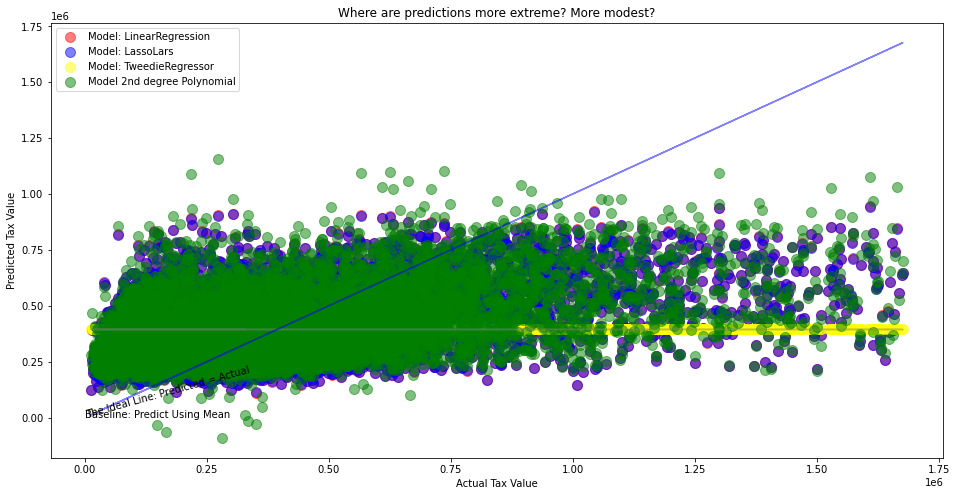

In [78]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lars, 
            alpha=.5, color="blue", s=100, label="Model: LassoLars")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

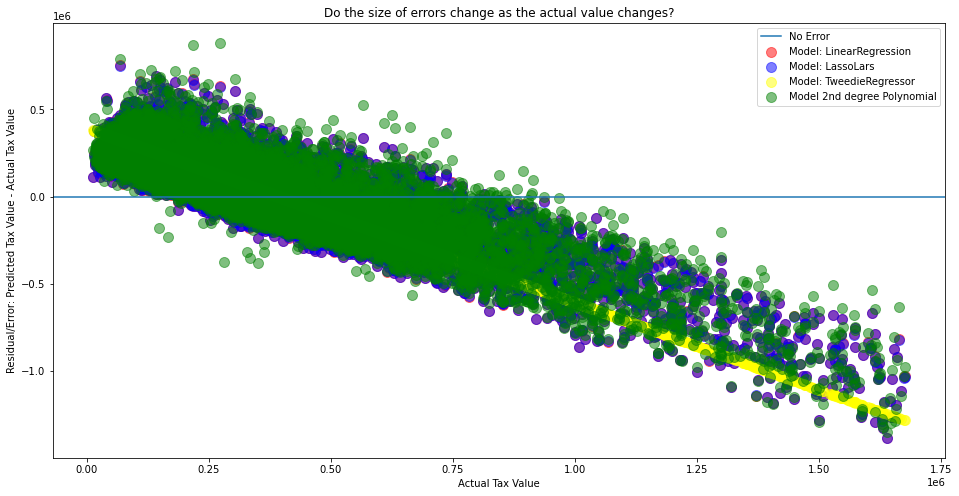

In [79]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm-y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lars-y_validate.tax_value, 
            alpha=.5, color="blue", s=100, label="Model: LassoLars")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm-y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2-y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

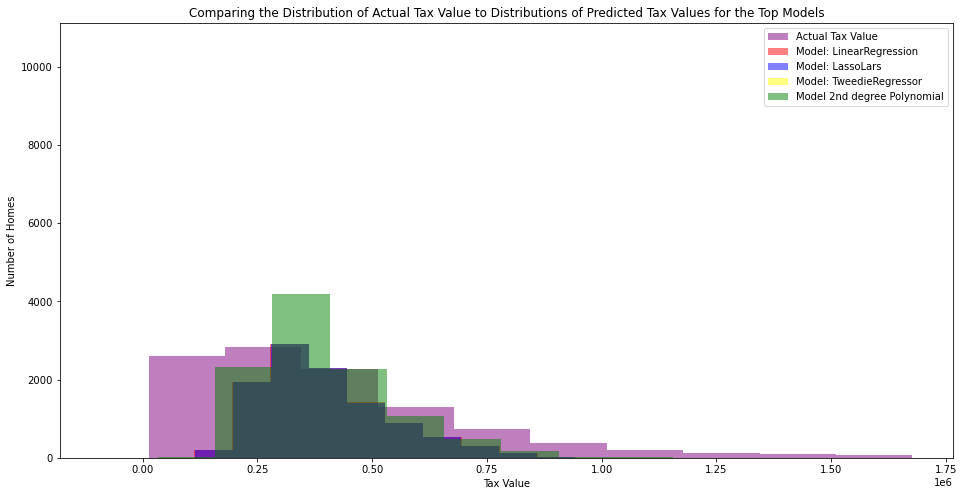

In [80]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='purple', alpha=.5, label="Actual Tax Value")
plt.hist(y_validate.tax_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_pred_lars, color='blue', alpha=.5, label="Model: LassoLars")
plt.hist(y_validate.tax_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Tax Value to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()

In [81]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

print('------------------------------------------------------------------------------------')

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

print('------------------------------------------------------------------------------------')

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

print('------------------------------------------------------------------------------------')

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for OLS using LinearRegression
Training/In-Sample:  251226.53695358292 
Validation/Out-of-Sample:  260839.94337525286
------------------------------------------------------------------------------------
RMSE for Lasso + Lars
Training/In-Sample:  251227.22308993991 
Validation/Out-of-Sample:  260828.69067498902
------------------------------------------------------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  287202.2860653361 
Validation/Out-of-Sample:  294613.3450699734
------------------------------------------------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  247855.3049842007 
Validation/Out-of-Sample:  257359.9213461035


In [82]:
## the polynomial model appears to do marginally better than all the other models

# Test Best Model

In [83]:
## make y test a dataframe

y_test = pd.DataFrame(y_test)

In [84]:
# predict on test
y_test['tax_pred_lm2'] = lm2.predict(X_test_degree2)

In [85]:
y_test.head()

,tax_value,tax_pred_lm2
parcelid,,
17238290,136868.0,235565.543899
12265597,180374.0,306617.714716
11312364,167666.0,279629.402283
13000409,54624.0,282785.522205
12267495,204169.0,280730.260832


In [86]:

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_pred_lm2)**(1/2)

In [87]:
print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  253431.95397904594


In [100]:
print("RMSE_mean (Train) = ", RMSE_mean)
print("RMSE_median (Train) = ", RMSE_median)

RMSE_mean (Train) =  287202.28606533643
RMSE_median (Train) =  292641.8756909651


# Feature Engineering

### SelectKBest

In [88]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

In [89]:
# find the top 3 X's correlated with y
f_selector.fit(X_train, y_train.tax_value)

SelectKBest(k=3, score_func=<function f_regression at 0x7fe0f5350dc0>)

In [90]:
# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

In [91]:
# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

f_feature

['square_feet', 'bedrooms', 'bathrooms']

### Recursive Feature Elimination

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [93]:
# initialize the ML algorithm
lm = LinearRegression()

In [94]:
# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 3)

In [95]:
# fit the data using RFE
rfe.fit(X_train,y_train)  

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [96]:
# get the mask of the columns selected
feature_mask = rfe.support_

In [97]:
# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

rfe_feature

['bedrooms', 'bathrooms', 'house_age']

In [98]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
1,bedrooms,1
2,bathrooms,1
5,house_age,1
3,fips,2
0,square_feet,3
4,lot_size,4


In [99]:
## bedrooms and bathrooms showed up on both SelectKBest and RFE